# Asymptotic structure of symmetry reduced general relativity by Ashtekar Bicak and Schmidt
##  Geoff Cope
##  Univeristy of Utah
##  January 4, 2022

Here we work with metric 2.26 which is in Bondi type coordinates

https://arxiv.org/abs/gr-qc/9608042

This is the companion paper

https://arxiv.org/abs/gr-qc/9608041

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [4]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [5]:
u,t,rho,phi,z,du,dt,drho,dphi,dz = symbols( 'u t rho phi z du dt drho dphi dz' ) 

In [6]:
psi = Function('psi')(u,rho)
psi

In [7]:
gamma = Function('gamma')(u,rho)
gamma

In [8]:
variables = Matrix( [u,rho,phi,z] )
variables

⎡u⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [du,drho,dphi,dz] ) 
differentials

⎡ du ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
lineElement = expand( exp(2*psi) * dz**2 + exp(2*(gamma-psi)) * (- (du + drho)**2 + drho**2) + rho**2 * exp(-2*psi) * dphi**2 ) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)    2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                            ⎤
⎢-ℯ         ⋅ℯ            -ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                            ⎥
⎢  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                                     ⎥
⎢-ℯ         ⋅ℯ                       0                   0             0     ⎥
⎢                                                                            ⎥
⎢                                                   2  -2⋅ψ(u, ρ)            ⎥
⎢           0                        0             ρ ⋅ℯ                0     ⎥
⎢                                                                            ⎥
⎢                                                                   2⋅ψ(u, ρ)⎥
⎣           0                        0                   0         ℯ         ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)    2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                            ⎤
⎢-ℯ         ⋅ℯ            -ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                            ⎥
⎢  2⋅γ(u, ρ)  -2⋅ψ(u, ρ)                                                     ⎥
⎢-ℯ         ⋅ℯ                       0                   0             0     ⎥
⎢                                                                            ⎥
⎢                                                   2  -2⋅ψ(u, ρ)            ⎥
⎢           0                        0             ρ ⋅ℯ                0     ⎥
⎢                                                                            ⎥
⎢                                                                   2⋅ψ(u, ρ)⎥
⎣           0                        0                   0         ℯ         ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("u rho phi z")
u,rho,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢⎡ ⎛   2⋅γ(u, ρ)  -2⋅ψ(u, ρ) ∂                2⋅γ(u, ρ)  -2⋅ψ(u, ρ) ∂                2⋅γ(u, ρ)  -2⋅ψ(u, ρ) ∂                2⋅γ(u, ρ)  -2
⎢⎢-⎜2⋅ℯ         ⋅ℯ          ⋅──(γ(u, ρ)) - 4⋅ℯ         ⋅ℯ          ⋅──(γ(u, ρ)) - 2⋅ℯ         ⋅ℯ          ⋅──(ψ(u, ρ)) + 4⋅ℯ         ⋅ℯ  
⎢⎢ ⎝                         ∂ρ                                     ∂u                                     ∂ρ                            
⎢⎢───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                                                         2                                             
⎢⎢                                

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                       ∂             ∂             ∂             ∂      
⎢  2              2                           2        2                  2             ──(γ(u, ρ))   ──(γ(u, ρ))   ──(ψ(u, ρ))   ──(ψ(u,
⎢ ∂              ∂               ⎛∂          ⎞        ∂                  ∂              ∂ρ            ∂u            ∂ρ            ∂u     
⎢───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ─────────── - ─────────── - ─────────── + ───────
⎢  2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ                 ρ             ρ             ρ             ρ 
⎢∂ρ             ∂ρ                                                                                                                       
⎢                                                                                                                                        
⎢                                 

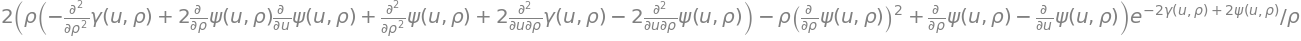

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           ⎛  ⎛    2                                    
⎢                                                                                           ⎜  ⎜   ∂               ∂           ∂         
⎢                                                                                       1.0⋅⎜ρ⋅⎜- ───(γ(u, ρ)) + 2⋅──(ψ(u, ρ))⋅──(ψ(u, ρ)
⎢  2              2                           2        2                  2                 ⎜  ⎜    2              ∂ρ          ∂u        
⎢ ∂              ∂               ⎛∂          ⎞        ∂                  ∂                  ⎝  ⎝  ∂ρ                                     
⎢───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ)) + ─────────────────────────────────────────────────
⎢  2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ                                                             
⎢∂ρ             ∂ρ                

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡  ⎛  2              2                           2        2                  2          ⎞                                                
⎢  ⎜ ∂              ∂               ⎛∂          ⎞        ∂                  ∂           ⎟   ∂             ∂             ∂             ∂  
⎢ρ⋅⎜───(γ(u, ρ)) - ───(ψ(u, ρ)) - 2⋅⎜──(ψ(u, ρ))⎟  - 2⋅─────(γ(u, ρ)) + 2⋅─────(ψ(u, ρ))⎟ + ──(γ(u, ρ)) - ──(γ(u, ρ)) - ──(ψ(u, ρ)) + ──(
⎢  ⎜  2              2              ⎝∂u         ⎠      ∂u ∂ρ              ∂u ∂ρ         ⎟   ∂ρ            ∂u            ∂ρ            ∂u 
⎢  ⎝∂ρ             ∂ρ                                                                   ⎠                                                
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                       ρ                                                                
⎢                                 

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                          ∂             ∂                                   ∂           
⎢               2                                                  2   1.0⋅──(γ(u, ρ))   ──(γ(u, ρ))                 2   1.0⋅──(γ(u, ρ)) 
⎢  ⎛∂          ⎞        ∂           ∂                 ⎛∂          ⎞        ∂ρ            ∂u             ⎛∂          ⎞        ∂ρ          
⎢- ⎜──(ψ(u, ρ))⎟  + 2.0⋅──(ψ(u, ρ))⋅──(ψ(u, ρ)) - 2.0⋅⎜──(ψ(u, ρ))⎟  + ─────────────── - ───────────  - ⎜──(ψ(u, ρ))⎟  + ─────────────── 
⎢  ⎝∂ρ         ⎠        ∂ρ          ∂u                ⎝∂u         ⎠           ρ               ρ         ⎝∂ρ         ⎠           ρ        
⎢                                                                                                                                        
⎢                                                       ∂                                                                    ∂           
⎢                                 

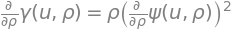

In [29]:
equation2pt28 = Eq(diff(gamma,rho) , solve( einsteinSimplified[1,0], diff(gamma,rho) )[0] ) 
equation2pt28

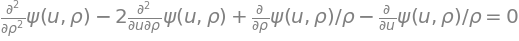

In [50]:
equation2pt29 = Eq(expand((1/rho)*ricciSimplified[2,2].args[1]),0)
equation2pt29

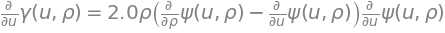

In [49]:
equation2pt27 = Eq( diff(gamma,u), solve( einsteinSimplified[0,0].subs(equation2pt28.args[0],equation2pt28.args[1]), diff(gamma,u) )[0] )
equation2pt27

In [62]:
vacuumFieldEquations = Matrix([equation2pt27,equation2pt28,equation2pt29])
vacuumFieldEquations

⎡  ∂                   ⎛∂             ∂          ⎞ ∂            ⎤
⎢  ──(γ(u, ρ)) = 2.0⋅ρ⋅⎜──(ψ(u, ρ)) - ──(ψ(u, ρ))⎟⋅──(ψ(u, ρ))  ⎥
⎢  ∂u                  ⎝∂ρ            ∂u         ⎠ ∂u           ⎥
⎢                                                               ⎥
⎢                                             2                 ⎥
⎢                ∂               ⎛∂          ⎞                  ⎥
⎢                ──(γ(u, ρ)) = ρ⋅⎜──(ψ(u, ρ))⎟                  ⎥
⎢                ∂ρ              ⎝∂ρ         ⎠                  ⎥
⎢                                                               ⎥
⎢                                  ∂             ∂              ⎥
⎢  2                 2             ──(ψ(u, ρ))   ──(ψ(u, ρ))    ⎥
⎢ ∂                 ∂              ∂ρ            ∂u             ⎥
⎢───(ψ(u, ρ)) - 2⋅─────(ψ(u, ρ)) + ─────────── - ─────────── = 0⎥
⎢  2              ∂u ∂ρ                 ρ             ρ         ⎥
⎣∂ρ                                                             ⎦